In [1]:
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment

### Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

### Loading dataset

In [3]:
df = pd.read_csv('datasets/Tweets.csv')

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df = df[['airline_sentiment', 'text']]
df_b = df.copy(deep=True)

In [6]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


### Visualizing datacount

In [7]:
df.shape

(14640, 2)

In [8]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

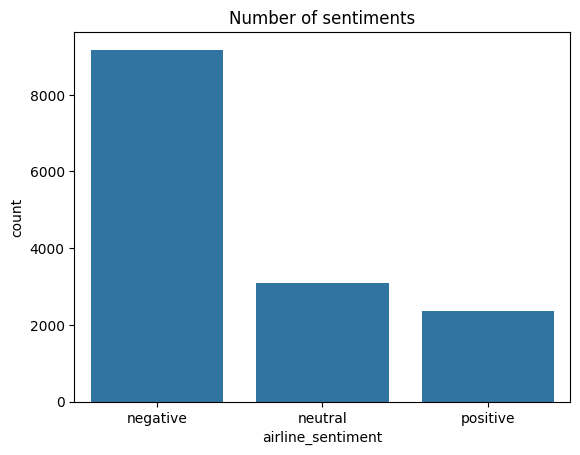

In [9]:
sns.barplot(df['airline_sentiment'].value_counts())
plt.title('Number of sentiments');

### Converting into numerical value and splitting daaset into train and test

In [10]:
con = {'negative':0,'neutral':1, 'positive':2}

def convert(sentiment):
    return con[sentiment]

df['airline_sentiment'] = df['airline_sentiment'].apply(convert)

In [11]:
df.head()

,airline_sentiment,text
0,1,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you've added commercials t...
2,1,@VirginAmerica I didn't today... Must mean I n...
3,0,@VirginAmerica it's really aggressive to blast...
4,0,@VirginAmerica and it's a really big bad thing...


In [12]:
df.iloc[2,1]

"@VirginAmerica I didn't today... Must mean I need to take another trip!"

In [13]:
df.iloc[3,1]

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'

In [14]:
sample = df.iloc[3,1]

In [15]:
sample.translate(str.maketrans('', '', string.punctuation))

'VirginAmerica its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse'

In [16]:
def rm_puntuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [17]:
df['text'] = df['text'].apply(rm_puntuation)

In [18]:
df.head()

,airline_sentiment,text
0,1,VirginAmerica What dhepburn said
1,2,VirginAmerica plus youve added commercials to ...
2,1,VirginAmerica I didnt today Must mean I need t...
3,0,VirginAmerica its really aggressive to blast o...
4,0,VirginAmerica and its a really big bad thing a...


In [19]:
vectorizer = TfidfVectorizer()

In [20]:
X = df['text']
y = df['airline_sentiment']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [22]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [23]:
X_train.shape, X_test.shape

((11712, 14524), (2928, 14524))

In [24]:
y_train.shape, y_test.shape

((11712,), (2928,))

### Model Training

In [25]:
clf = LogisticRegression(multi_class='multinomial', max_iter=500)

In [26]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=500, multi_class='multinomial')

In [27]:
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

In [28]:
print(f'Accuracy of Train: {accuracy_score(y_pred_train, y_train)*100:.2f}%')
print(f'Accuracy of Test: {accuracy_score(y_pred, y_test)*100:.2f}%')

Accuracy of Train: 88.76%
Accuracy of Test: 80.19%


In [29]:
print(f"F1-Score of Train: {f1_score(y_pred_train, y_train, average='weighted')*100:.2f}%")
print(f"F1-score of Test: {f1_score(y_pred, y_test, average='weighted')*100:.2f}%")

F1-Score of Train: 89.17%
F1-score of Test: 81.45%


In [30]:
f1_score(y_test, y_pred, average=None)

array([0.88361525, 0.59459459, 0.67883212])

In [31]:
print(f"F1-Score of Train in each class: {f1_score(y_pred_train, y_train, average=None)}")
print(f"F1-score of Test in each class: {f1_score(y_pred, y_test, average=None)}")

F1-Score of Train in each class: [0.92769529 0.78964979 0.83454071]
F1-score of Test in each class: [0.88361525 0.59459459 0.67883212]


In [32]:
cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

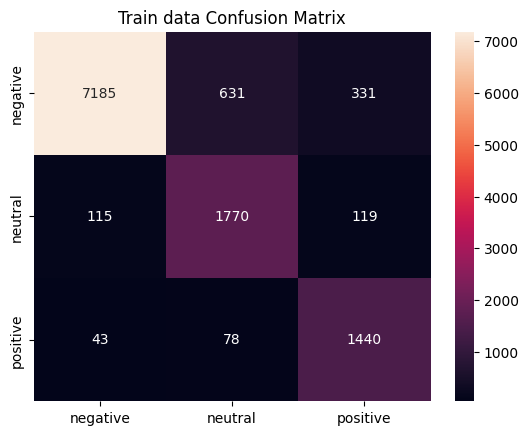

In [33]:
sns.heatmap(cm_train, annot=True, fmt='', xticklabels=['negative','neutral', 'positive'], yticklabels=['negative','neutral', 'positive'])
plt.title('Train data Confusion Matrix');

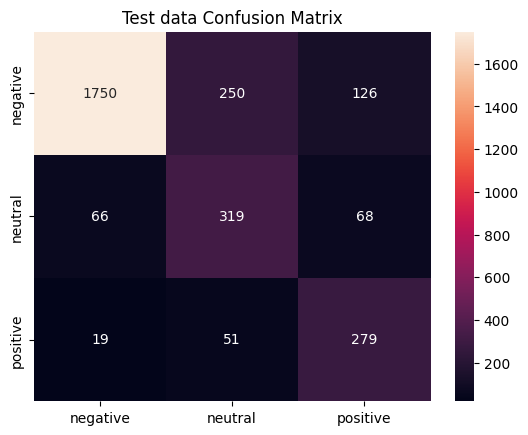

In [34]:
sns.heatmap(cm_test, annot=True, fmt='', xticklabels=['negative','neutral', 'positive'], yticklabels=['negative','neutral', 'positive'])
plt.title('Test data Confusion Matrix');

### Model testing with examples

In [35]:
def predict_sentiment(tweet):
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    tweet = pd.Series(tweet)
    tweet = vectorizer.transform(tweet)
    sentiment =  clf.predict(tweet)
    if sentiment == 0:
        return 'Negative'
    elif sentiment == 1:
        return 'Neutral'
    else:
        return 'Positive'

In [36]:
predict_sentiment('The flight was disguisting and food food was awesome but flight attendent were rude and seat was comfortable')

'Negative'

In [37]:
predict_sentiment('We will be arriving to destination soon')

'Negative'

In [38]:
predict_sentiment('We are happy to travel')

'Negative'

## Training binary model with positive and negative data only

In [39]:
df_b.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [40]:
df_b.shape

(14640, 2)

In [41]:
df_b = df_b[df_b['airline_sentiment'] != 'neutral']
df_b.reset_index(inplace=True, drop=True)

In [42]:
df_b.head()

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,negative,@VirginAmerica it's really aggressive to blast...
2,negative,@VirginAmerica and it's a really big bad thing...
3,negative,@VirginAmerica seriously would pay $30 a fligh...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [43]:
df_b.shape

(11541, 2)

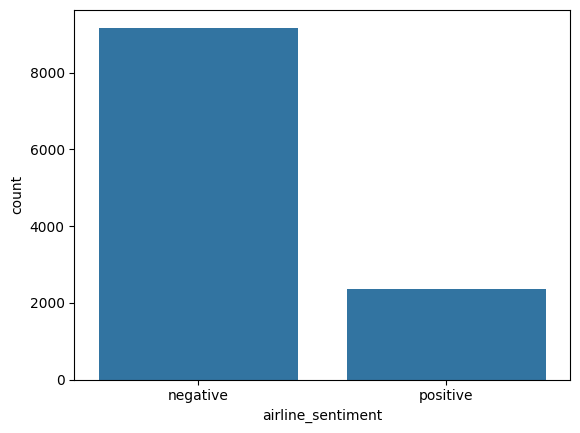

In [44]:
sns.barplot(df_b['airline_sentiment'].value_counts());

In [45]:
df_b['airline_sentiment'] = df_b['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)
df_temp = df_b.copy(deep=True)
df_b['text'] = df_b['text'].apply(rm_puntuation)

In [46]:
df_b.head()

,airline_sentiment,text
0,1,VirginAmerica plus youve added commercials to ...
1,0,VirginAmerica its really aggressive to blast o...
2,0,VirginAmerica and its a really big bad thing a...
3,0,VirginAmerica seriously would pay 30 a flight ...
4,1,VirginAmerica yes nearly every time I fly VX t...


In [47]:
X = df_b['text']
y = df_b['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [48]:
vectorizer_b = TfidfVectorizer()
X_train = vectorizer_b.fit_transform(X_train)
X_test = vectorizer_b.transform(X_test)

In [49]:
b_clf = LogisticRegression(max_iter=500)
b_clf.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [50]:
y_pred_train = b_clf.predict(X_train)
y_pred = b_clf.predict(X_test)

In [51]:
print(f'Accuracy of Train: {accuracy_score(y_pred_train, y_train)*100:.2f}%')
print(f'Accuracy of Test: {accuracy_score(y_pred, y_test)*100:.2f}%')

Accuracy of Train: 93.04%
Accuracy of Test: 90.69%


In [52]:
print(f"F1-Score of Train: {f1_score(y_pred_train, y_train)*100:.2f}%")
print(f"F1-score of Test: {f1_score(y_pred, y_test)*100:.2f}%")

F1-Score of Train: 80.07%
F1-score of Test: 72.19%


In [53]:
cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

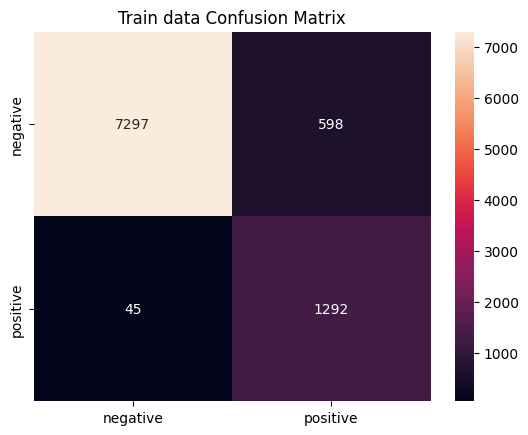

In [54]:
sns.heatmap(cm_train, annot=True, fmt='', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title('Train data Confusion Matrix');

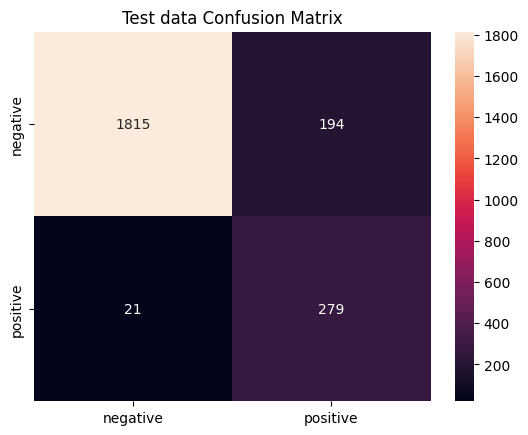

In [55]:
sns.heatmap(cm_test, annot=True, fmt='', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title('Test data Confusion Matrix');

In [56]:
b_clf.coef_

array([[-0.04965901, -0.02161906, -0.00993419, ..., -0.08463491,
        -0.0074572 , -0.07381241]])

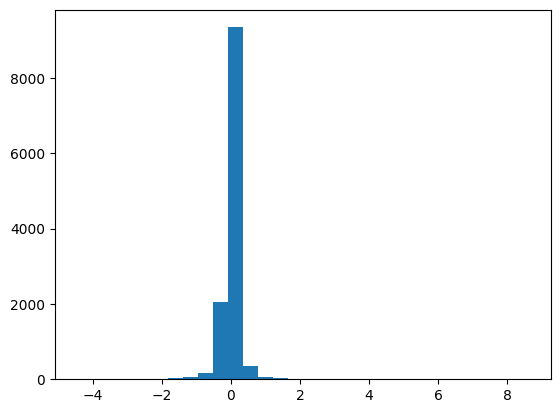

In [57]:
plt.hist(b_clf.coef_[0], bins=30);

In [58]:
word_index_map = vectorizer_b.vocabulary_
word_index_map

{'united': 11351,
 'wanna': 11686,
 'be': 2110,
 'ride': 9379,
 'airline': 1490,
 'love': 7125,
 'airplane': 1500,
 'seriously': 9765,
 'ua': 11159,
 '806': 1104,
 'delayed': 3581,
 'because': 2130,
 'of': 8015,
 'the': 10725,
 'copilot': 3242,
 'isnt': 6492,
 'here': 5415,
 'for': 4808,
 '15': 192,
 'hours': 5567,
 'and': 1649,
 'he': 5348,
 'is': 6484,
 'only': 8091,
 'flying': 4763,
 'from': 4910,
 'raleigh': 8950,
 'disappointing': 3782,
 'southwestair': 10145,
 'my': 7665,
 'companion': 3056,
 'pass': 8325,
 'qualified': 8905,
 '4th': 839,
 'year': 12063,
 'hollymais': 5490,
 'first': 4605,
 'seats': 9689,
 'open': 8105,
 'on': 8065,
 'ua5097': 11232,
 'no': 7828,
 'upgrades': 11436,
 'processed': 8784,
 'gate': 4999,
 'agents': 1451,
 'yyz': 12121,
 'said': 9543,
 'their': 10738,
 'too': 10941,
 'busy': 2518,
 'not': 7913,
 'cool': 3237,
 'httptco6kpyhcka9l': 5682,
 'appreciate': 1763,
 'you': 12087,
 'looking': 7084,
 'can': 2603,
 'compensate': 3068,
 'me': 7335,
 'anything': 1

In [59]:
# let's look at the weights for each word
# try it with different threshold values!
threshold = 2

print("Most positive words:")
for word, index in word_index_map.items():
    weight = b_clf.coef_[0][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
love 4.409674120050606
southwestair 3.2846987661331464
appreciate 2.970413665225613
virginamerica 3.194341098880378
thanks 8.609850530116422
jetblue 3.5323736648854926
good 3.1412850753480197
great 5.576493261926874
thank 8.291730713146968
amazing 4.20290184924182
kudos 2.802608508653402
best 4.2655911656034275
excellent 2.416747850551131
awesome 4.411267067791517
wonderful 2.081891351162181
thx 2.8966606530408514
worries 2.5059990400085606


In [60]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = b_clf.coef_[0][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
delayed -3.0375381193818827
hours -3.306017753976223
no -4.33497430766585
not -4.439791848517965
late -2.0694220134296333
cancelled -3.2134344199995017
dont -2.0677926179777493
call -2.0880685465347733
why -2.6132970403591194
delay -2.0947916145803767
worst -3.138064361072967
hour -2.2244176625966925
hold -2.863224083248637
luggage -2.0055494079865896
nothing -2.3362946650687326


In [61]:
# Exercise: print the most-wrong tweets for both classes
# i.e. find a negative review where p(y = 1 | x) is closest to 1
#      find a positive review where p(y = 1 | x) is closest to 0

# Exercise: set class_weight='balanced'

In [62]:
clf_balanced = LogisticRegression(max_iter=500, class_weight='balanced')

In [63]:
clf_balanced.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [64]:
y_pred_train = clf_balanced.predict(X_train)
y_pred = clf_balanced.predict(X_test)

In [65]:
print(f'Accuracy of Train: {accuracy_score(y_pred_train, y_train)*100:.2f}%')
print(f'Accuracy of Test: {accuracy_score(y_pred, y_test)*100:.2f}%')

Accuracy of Train: 95.23%
Accuracy of Test: 91.81%


In [66]:
print(f"F1-Score of Train: {f1_score(y_pred_train, y_train)*100:.2f}%")
print(f"F1-score of Test: {f1_score(y_pred, y_test)*100:.2f}%")

F1-Score of Train: 89.09%
F1-score of Test: 81.16%


In [67]:
cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

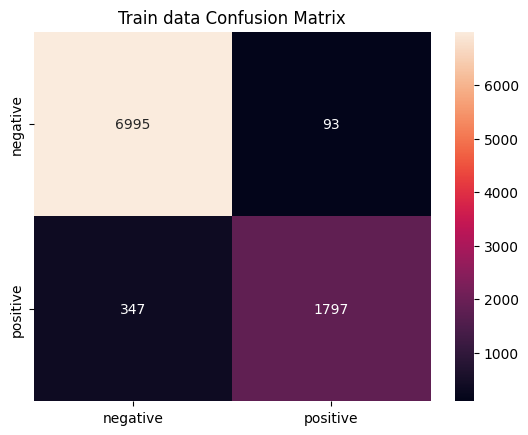

In [68]:
sns.heatmap(cm_train, annot=True, fmt='', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title('Train data Confusion Matrix');

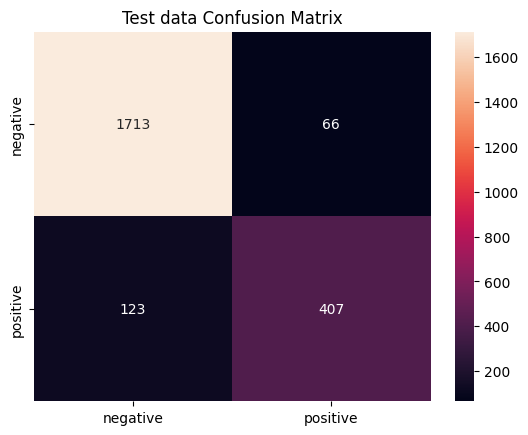

In [69]:
sns.heatmap(cm_test, annot=True, fmt='', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title('Test data Confusion Matrix');

In [70]:
most_wrong_negative_tweet = None
max_positive_probability = 0

most_wrong_positive_tweet = None
min_positive_probability = 1

for i, tweet in enumerate(df_temp['text']):
    tweet_copy = tweet[:]
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    tweet = pd.Series(tweet)
    tweet = vectorizer_b.transform(tweet)
    probability_positive = clf_balanced.predict_proba(tweet)[0][1]
    
    # Check if it's a negative review with high probability of being positive
    if df_b['airline_sentiment'][i] == 0 and probability_positive > max_positive_probability:
        max_positive_probability = probability_positive
        most_wrong_negative_tweet = tweet_copy
    
    # Check if it's a positive review with low probability of being positive
    if df_b['airline_sentiment'][i] == 1 and probability_positive < min_positive_probability:
        min_positive_probability = probability_positive
        most_wrong_positive_tweet = tweet_copy

print("Most wrong positive tweet:", most_wrong_positive_tweet)
print("Predicted probability of being positive:", min_positive_probability)
print()
print("Most wrong negative tweet:", most_wrong_negative_tweet)
print("Predicted probability of being positive:", max_positive_probability)

Most wrong positive tweet: @AmericanAir thanks for forcing me to check -in my carry - on luggage. That is exactly why I spent extra money on "travel size" toiletries
Predicted probability of being positive: 0.12103987362084576

Most wrong negative tweet: @SouthwestAir oh, ok!  all good!  looking forward to escaping the cold for a bit!  thanks!
Predicted probability of being positive: 0.9791311285354615
